### Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})

data_columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "salary"
]

raw_train = pd.read_csv('adult.data', names=data_columns)
print("Shape of data:", raw_train.shape)

raw_train.head()

Shape of data: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
raw_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [3]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
raw_train["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Пропущенных значений нет. В данных есть знаки вопроса, но это тоже значение, несущее свой смысл, поэтому его можно оставить. Кроме того, деревья умеют работать даже с пропущенными значениями

In [5]:
raw_train["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [6]:
train_target = (raw_train["salary"] == " >50K").astype(int)
train_target.tail()

32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, dtype: int32

In [7]:
train_data = raw_train.drop("salary", axis=1)
train_data = pd.get_dummies(train_data)
train_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Тестовые данные

In [8]:
raw_test = pd.read_csv('adult.test', names=data_columns, skiprows=1)
print("Shape of data:", raw_test.shape)

raw_test.head()

Shape of data: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
raw_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
education-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hours-per-week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [10]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
raw_test["salary"].value_counts()

 <=50K.    12435
 >50K.      3846
Name: salary, dtype: int64

In [12]:
test_target = (raw_test["salary"] == " >50K.").astype(int)
test_target.tail()

16276    0
16277    0
16278    0
16279    0
16280    1
Name: salary, dtype: int32

In [13]:
test_data = raw_test.drop("salary", axis=1)
test_data = pd.get_dummies(test_data)
test_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
for i, col in enumerate(train_data.columns):
    if col not in test_data.columns:
        print(i, col)

81 native-country_ Holand-Netherlands


В тестовых данных отсутствуют люди, родившиеся в Нидерландах, поэтому конечная матрица *test_data* имеет на одну колонку меньше, что ломает алгоритм sklearn (количество фичей на трейне и тесте должно быть одинаковым). Добавим эту колонку в тестовые данные, она будет полностью заполнена 0, так как голландцев в тесте нет

In [15]:
test_data["native-country_ Holand-Netherlands"] = np.zeros(len(test_data), dtype=np.uint8)
test_data["native-country_ Holand-Netherlands"]

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    0
Name: native-country_ Holand-Netherlands, Length: 16281, dtype: uint8

In [16]:
# меняем в тесте порядок колонок на тот, что был в трейне
right_cols_order = train_data.columns.tolist()
test_data = test_data[right_cols_order]
test_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Предсказания с использованием sklearn

Если не ограничивать максимальную глубину (max_depth=None), то она будет равна 49. Оптимального качества для этого датасета с использованием деревьев можно добиться при max_depth=10

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

sklearn_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

sklearn_tree.fit(train_data, train_target)

print("Accuracy on train:", sklearn_tree.score(train_data, train_target))

Accuracy on train: 0.8703971008261417


In [18]:
sklearn_preds = sklearn_tree.predict(test_data)

print("="*10, "Results obtained with sklearn", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(test_target, sklearn_preds), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        test_target,
        sklearn_preds,
        target_names=["<=50K", ">50K"]
    ),
    sep=""
)

========== Results obtained with sklearn ========== 

Confusion matrix:
[[11713   722]
 [ 1554  2292]]

Metrics:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     12435
        >50K       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



### Случайный лес sklearn

Посчитаем OOB для разного количества деревьев в лесу и их максимальной глубины

100% (5 of 5) |##########################| Elapsed Time: 0:02:27 Time:  0:02:27


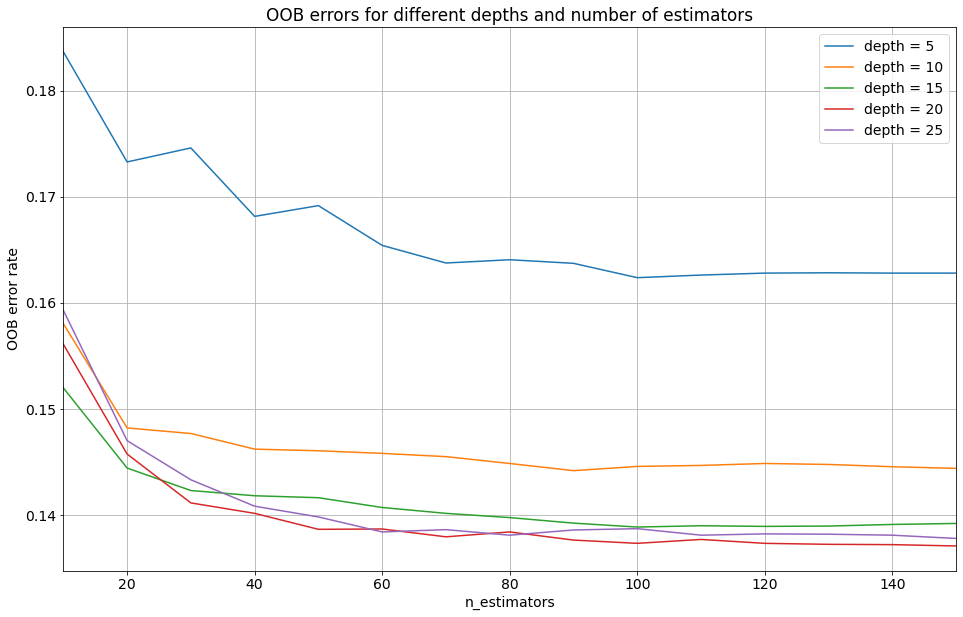

In [19]:
import warnings

from progressbar import ProgressBar
from sklearn.ensemble import RandomForestClassifier


warnings.filterwarnings("ignore")

pbar = ProgressBar()
sklearn_rf = RandomForestClassifier(
    criterion='gini',
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

min_estimators = 10
max_estimators = 150

min_depth = 5
max_depth = 25

oob_errors = dict()
depths = np.arange(min_depth, max_depth+1, 5)
for d in pbar(depths):
    oob_errors[d] = list()
    for n in range(min_estimators, max_estimators+1, 10):
        sklearn_rf.set_params(n_estimators=n, max_depth=d)
        sklearn_rf.fit(train_data, train_target)
    
        oob_error = 1 - sklearn_rf.oob_score_
        oob_errors[d].append((n, oob_error))
    
plt.figure(figsize=(16, 10))
for d in oob_errors.keys():
    ns, errors = zip(*oob_errors[d])
    plt.plot(ns, errors, label=f"depth = {d}")
    
plt.legend()
plt.title("OOB errors for different depths and number of estimators")
plt.ylabel("OOB error rate")
plt.xlabel("n_estimators")
plt.xlim(min_estimators, max_estimators)
plt.grid()
plt.show()

Как видно из графиков, наилучших результатов можно добиться при использовании n_estimators=100 и max_depth=20

In [20]:
sklearn_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=20,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

sklearn_rf.fit(train_data, train_target)

print("Accuracy on train:", sklearn_rf.score(train_data, train_target))

Accuracy on train: 0.9157274039495101


In [21]:
sklearn_preds_rf = sklearn_rf.predict(test_data)

print("="*10, "Results obtained with sklearn", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(test_target, sklearn_preds_rf), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        test_target,
        sklearn_preds_rf,
        target_names=["<=50K", ">50K"]
    ),
    sep=""
)

========== Results obtained with sklearn ========== 

Confusion matrix:
[[11765   670]
 [ 1538  2308]]

Metrics:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     12435
        >50K       0.78      0.60      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.77      0.80     16281
weighted avg       0.86      0.86      0.86     16281



Результаты практически такие же, что и для одного дерева. Лишь некоторые метрики выросли на 0.01 - 0.02. Однако нельзя не отметить, что такое качество достигается при выросшей accuracy на трейне (0.916 против 0.870), что говорит о меньшей склонности случайного леса к переобучению, если сравнивать его с одним деревом

### Собственная реализация дерева

Реализуем собственную версию решающего дерева и сравним результаты его работы с аналогом из sklearn

In [22]:
def gini_impurity(y, sample_weights=None):
    """
    Calculate gini for labels.
    
    :param y: Training labels. np.array.
    :param sample_weights: Weights for each of samples. np.array.
    
    :return: The gini for y. Float.
    """
    
    gini = 1
    
    # amount of labels
    num_labels = y.shape[0]
    
    # dict, containing info about number of each label in y
    labelCounts = {}
    for i in range(num_labels):
        if y[i] not in labelCounts.keys():
            labelCounts[y[i]] = 0
            
        labelCounts[y[i]] += sample_weights[i]
        
    for key in labelCounts:
        prob = float(labelCounts[key]) / float(np.sum(sample_weights))
        gini -= prob ** 2
    
    return gini


def get_classification_result(tree, sample):
    """
    Make predictions for one sample using pretrained decision tree.
    
    :param sample: One sample. pd.Dataframe.
    
    :return: Predicted label for a given sample. Integer.
    """
    
    # get the first element
    feature_name = list(tree.keys())[0]
    dict_2nd = tree[feature_name]
    key = sample.loc[feature_name]
    if key not in dict_2nd:
        key = np.random.choice(list(dict_2nd.keys()))
        
    key_value = dict_2nd[key]
    if isinstance(key_value, dict):
        label = get_classification_result(key_value, sample)
    else:
        label = key_value
        
    return label


def make_majority_choice(y, sample_weights=None):
    """
    Return the label which appears the most in y.
    
    :param y: Training labels. np.array.
    :param sample_weights: Weights for each of samples. np.array.
    
    :return: The majority label. Integer.
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
        
    majority_label = y[0]
    
    num_dict = {}
    for i in range(y.shape[0]):
        if y[i] not in num_dict.keys():
            num_dict[y[i]] = sample_weights[i]
        else:
            num_dict[y[i]] += sample_weights[i]
            
    majority_label = max(num_dict, key=num_dict.get)
    
    return majority_label



class MyTree(object):
    '''
    Decision tree for binary classification, uses gini
    '''

    
    def __init__(self,
                 max_depth,
                 min_samples_leaf):
        '''
        :param max_depth: The max depth for the decision tree. Integer.
        :param min_samples_leaf: The minimal samples in a leaf. Integer.
        '''
        self._tree = None
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf

        
    def fit(self, X, y, sample_weights=None):
        """
        Build the tree using training data.
        
        :param X: Training features. pd.Dataframe.
        :param y: Training labels. pd.Series.
        """
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
        
        # prepare data for training
        feature_names = X.columns.tolist()
        X = np.array(X)
        y = np.array(y)
        # training 
        self._tree = self._make_tree(X, y, feature_names, depth=1, sample_weights=sample_weights)
        return self
    

    def _gini_purification(self, X, y, index, sample_weights=None):
        """
        Calculate gini impurity according to a vector of features.
        
        :param X: Training features. np.array.
        :param y: Training labels. np.array.
        :param index: Index of the feature calculating. Integer.
        :param sample_weights: Weights for each of samples. np.array.
        
        :return: Gini after splitting by feature having given index. Float.
        """
        
        impurity = 0
        
        old_cost = gini_impurity(y, sample_weights)
        unique_values = np.unique(X[:, index])
        new_cost = 0.0
        # split the values of given feature and calculate the cost
        for val in unique_values:
            part_X, part_y, part_sample_weights = self._split_data(X, y, index, val, sample_weights)
            prob = np.sum(part_sample_weights) / float(np.sum(sample_weights))
            new_cost += prob * gini_impurity(part_y, part_sample_weights)
            
        impurity = old_cost - new_cost
        
        return impurity
    

    def _split_data(self, X, y, index, value, sample_weights=None):
        """
        Return the split of data where feature having given index equals value.
        
        :param X: Training features. np.array.
        :param y: Training labels. np.array.
        :param index: Index of the feature for splitting. Integer.
        :param value: The value of the feature having given index for splitting.
        :param sample_weights: Weights for each of samples. np.array.
        
        :return: The part of X, y and sample_weights where feature having given index equals value. np.arrays.
        """
        
        res = []
        featute_vec = X[:, index]
        X = X[:, [idx for idx in range(X.shape[1]) if idx != index]]
        
        for i in range(len(featute_vec)):
            if featute_vec[i] == value:
                res.append(i)
                
        part_X = X[res, :]
        part_y = y[res]
        part_sample_weights = sample_weights[res]
        
        return part_X, part_y, part_sample_weights

    
    def _choose_best_feature(self, X, y, sample_weights=None):
        """
        Choose the best feature to split w.r.t. to criterion.
        
        :param X: Training features. np.array.
        :param y: Training labels. np.array.
        :param sample_weights: Weights for each of samples. np.array.
        
        :return: Index of the best feature. Integer.
        """
        
        best_feature_idx = 0
        
        n_features = X.shape[1]
        X_new = X
        num_new_features = X_new.shape[1]
        
        best_gain = 0.0
        for idx in range(num_new_features):
            info_gain = self._gini_purification(X_new, y, idx, sample_weights)
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature_idx = idx          
        
        return best_feature_idx

    
    def _make_tree(self, X, y, feature_names, depth, sample_weights=None):
        """
        Create the decision tree using the data.
        
        :param X: Training features. np.array.
        :param y: Training labels. np.array.
        :param feature_names: Names of features in X. list.
        :param depth: Current Depth for this node. int.
        :param sample_weights: Weights for each of samples. np.array.
        
        :return: Tree in a form of a Python dictionary. dict.
        """
        mytree = dict()
        
        # return the label which appears the most in y if:
        # 1. there are no features
        # 2. all labels occur to be the same
        # 3. reached max depth 
        # 4. X became too small
        if len(feature_names) == 0 or len(np.unique(y)) == 1 or depth >= self.max_depth or len(X) <= self.min_samples_leaf:
            return make_majority_choice(y, sample_weights)
        
        best_feature_idx = self._choose_best_feature(X, y, sample_weights)
        best_feature_name = feature_names[best_feature_idx]
        
        feature_names = feature_names[:]
        feature_names.remove(best_feature_name)
        
        mytree = {best_feature_name: {}}
        unique_vals = np.unique(X[:, best_feature_idx])
        for val in unique_vals:
            part_X, part_y, part_sample_weights = self._split_data(X, y, best_feature_idx, val, sample_weights)
            mytree[best_feature_name][val] = self._make_tree(part_X, part_y, feature_names, depth+1, part_sample_weights)
        
        return mytree

    
    def predict(self, X):
        """
        Make classification predictions for given X.
        
        :param X: Testing/val features. pd.Dataframe.
        
        :return: Predicted test/val labels. np.array.
        """
        assert self._tree is not None, "You need to train tree first! Please use fit() method."

        if len(X.shape) == 1:
            return get_classification_result(self._tree, X)
        
        else:
            results = []
            for i in range(X.shape[0]):
                results.append(get_classification_result(self._tree, X.iloc[i, :]))
                
            return np.array(results)

Объявление и обучение. Написанный метод fit() отрабатывает значительно дольше, чем аналог из sklearn (несколько минут против нескольких секунд). Параметры обучения обоих деревьев совпадают: criterion='gini' (для самописного дерева реализован только он), max_depth=10, min_samples_leaf=1

In [23]:
my_tree = MyTree(
    max_depth=10,
    min_samples_leaf=1
)

my_tree.fit(train_data, train_target)
print("Training completed!")

Training completed!


Качество на трейне. Очевидно, что дерево переобучилось, хотя максимальная глубина использовалась такая же, как и для аналога из sklearn. По-видимому, алгоритм sklearn гораздо более сложен, что позволяет ему эффективно бороться с переобучением

In [24]:
my_preds_train = my_tree.predict(train_data)

print("="*10, "Results obtained with custom tree on train data", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(train_target, my_preds_train), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        train_target,
        my_preds_train,
        target_names=["<=50K", ">50K"]
    ),
    sep=""
)

========== Results obtained with custom tree on train data ========== 

Confusion matrix:
[[24720     0]
 [    1  7840]]

Metrics:
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     24720
        >50K       1.00      1.00      1.00      7841

    accuracy                           1.00     32561
   macro avg       1.00      1.00      1.00     32561
weighted avg       1.00      1.00      1.00     32561



Предсказания. В последней ячейке, для сравнения, дублируются продемонстированные выше результаты, полученные с использованием sklearn. Качество самописного дерева значительно отстает от аналога. Основные проблемы связаны с классом ">50K", сэмплов которого значительно меньше, чем "<=50K". Резкое падение качества вызвано черезвычайно сильным переобучением, поэтому стоит ожидать, что результаты MyTree с меньшей глубиной будут лучше.

Вероятно, алгоритм sklearn.tree.DecisionTreeClassifier более сложен, чем реализованный здесь, что позволяет ему достигать большего качества при меньшем времени работы.

Однако следует отметить, что обучение происходило на полном датасете, со всеми 108 фичами и 32561 сэмплами. Это говорит о принципиальной способности написанного дерева работать с такими данными, что уже само по себе не плохо. Для простейшего алгоритма результаты можно считать приемлемыми

In [25]:
my_preds = my_tree.predict(test_data)

print("="*10, "Results obtained with custom tree on test data", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(test_target, my_preds), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        test_target,
        my_preds,
        target_names=["<=50K", ">50K"]
    ),
    sep=""
)

========== Results obtained with custom tree on test data ========== 

Confusion matrix:
[[9685 2750]
 [2493 1353]]

Metrics:
              precision    recall  f1-score   support

       <=50K       0.80      0.78      0.79     12435
        >50K       0.33      0.35      0.34      3846

    accuracy                           0.68     16281
   macro avg       0.56      0.57      0.56     16281
weighted avg       0.69      0.68      0.68     16281



In [26]:
print("="*10, "Results obtained with sklearn on test data", 10*"=", '\n')
print("Confusion matrix:\n", confusion_matrix(test_target, sklearn_preds), sep="")
print(
    "\nMetrics:\n",
    classification_report(
        test_target,
        sklearn_preds,
        target_names=["<=50K", ">50K"]
    ),
    sep=""
)

========== Results obtained with sklearn on test data ========== 

Confusion matrix:
[[11713   722]
 [ 1554  2292]]

Metrics:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     12435
        >50K       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

